,no.,id,size_bytes,price,rating_count_tot,user_rating,user_rating_ver,sup_devices.num
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,3.526956,3.253578,37.361817
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,1.517948,1.809363,3.737715
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,9.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,3.500000,2.500000,37.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,4.000000,4.000000,37.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,4.500000,4.500000,38.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,5.000000,5.000000,47.000000


In [2]:
data.isnull().sum()

no.                 0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
dtype: int64

In [3]:
data = data[data['price'] >= 0]
data.describe()

,no.,id,size_bytes,price,rating_count_tot,user_rating,user_rating_ver,sup_devices.num
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,3.526956,3.253578,37.361817
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,1.517948,1.809363,3.737715
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,9.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,3.500000,2.500000,37.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,4.000000,4.000000,37.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,4.500000,4.500000,38.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,5.000000,5.000000,47.000000


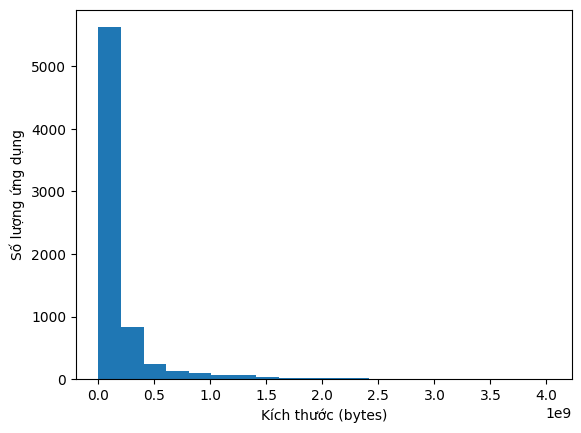

In [4]:
plt.hist(data['size_bytes'], bins=20)
plt.xlabel('Kích thước (bytes)')
plt.ylabel('Số lượng ứng dụng')
plt.show()